In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [23]:
import numpy as np

In [8]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2888 - accuracy: 0.9160


In [13]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1386 - accuracy: 0.9590 - val_loss: 0.1018 - val_accuracy: 0.9696
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1065 - accuracy: 0.9669 - val_loss: 0.0833 - val_accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0893 - accuracy: 0.9727 - val_loss: 0.0794 - val_accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0768 - accuracy: 0.9761 - val_loss: 0.0749 - val_accuracy: 0.9773
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0667 - accuracy: 0.9787 - val_loss: 0.0774 - val_accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0629 - accuracy: 0.9798 - val_loss: 0.0705 - val_accuracy: 0.9797
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0553 - accuracy: 0.9819 - val_loss: 0.0730 - val_accuracy:

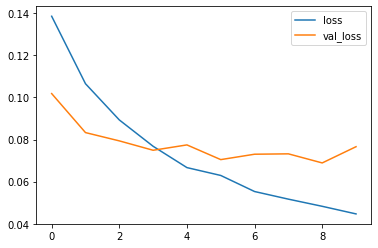

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

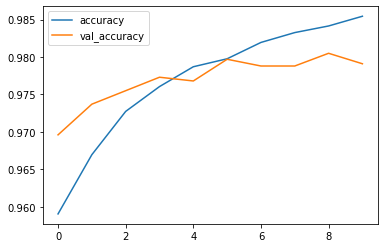

In [15]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [16]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9791
[0.07659365236759186, 0.9790999889373779]


In [21]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test).argmax(axis=1)
print(confusion_matrix(y_pred, y_test))

[[ 971    0    3    1    0    2    3    2    5    3]
 [   1 1127    0    0    0    0    3    9    1    3]
 [   0    3 1012    3    3    0    0   11    3    0]
 [   2    0    3  996    0   19    1    1    8    7]
 [   0    0    1    0  960    0    1    0    3    8]
 [   1    1    0    3    0  857    4    0    3    1]
 [   3    2    3    0    7    5  944    0    0    0]
 [   1    0    6    3    1    1    0 1000    5    6]
 [   1    2    4    4    2    6    2    2  944    1]
 [   0    0    0    0    9    2    0    3    2  980]]


Text(0.5, 1.0, 'True label 5, predicted label 0')

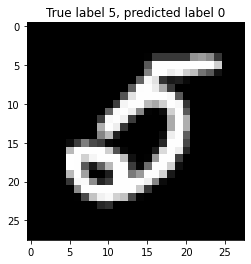

In [28]:
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label %s, predicted label %s" % (y_test[i], y_pred[i]))

Text(0.5, 1.0, 'True label 9, predicted label 4')

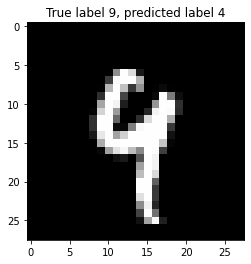

In [32]:
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label %s, predicted label %s" % (y_test[i], y_pred[i]))